# Importing the Necessary Libraries

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

import pandas as pd

import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt

from pandas.plotting import parallel_coordinates
from math import sqrt

%matplotlib inline

# Creating a Pandas DataFrame from a CSV file

In [8]:
#file_name = '../original/D31.csv'
#file_name = '../original/g2-2-50.csv'
file_name = '../original/g2-2-30.csv'
dataset_clusters = 2

#file_name = 'noised/g2-2-30.csv'
#file_name = 'evaluation.csv'

#file_name = '../gaussian100.csv'
#file_name = '../CE3/iris.csv'
#file_name = '../CE3/wine.csv'
#file_name = '../CE3/wdbc.csv'
#file_name = '../CE3/glass.csv'

# To get file in "result" folder use "HDBSCAN.py" 
#file_name = '../result2/t4.8k.csv'
#file_name = '../result2/t5.8k.csv'
#file_name = '../result2/t8.8k.csv'
#file_name = '../result2/t7.10k.csv'

#file_name = '../result2/g2-2-30.csv'
file_name = '../result2/varying_densities.csv'


In [9]:
# Overlapped Datasets
#file_name = '../BS3WC-Datasets/overlapped/scene.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-beach.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-sunset.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-fall.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-field.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-mountain.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-urban.csv'

#file_name = '../BS3WC-Datasets/overlapped/birds.csv'

# Systhetic Datasets
#file_name = '../BS3WC-Datasets/Synthetic/a3.txt'
#file_name = '../BS3WC-Datasets/Synthetic/Aggregation.txt'
#file_name = '../BS3WC-Datasets/Synthetic/Compound.txt'
#file_name = '../BS3WC-Datasets/Synthetic/dim128.txt'
#file_name = '../BS3WC-Datasets/Synthetic/dim512.txt'
#file_name = '../BS3WC-Datasets/Synthetic/flame.txt'
#file_name = '../BS3WC-Datasets/Synthetic/jain.txt'
#file_name = '../BS3WC-Datasets/Synthetic/pathbased.txt'
#file_name = '../BS3WC-Datasets/Synthetic/R15.txt'
#file_name = '../BS3WC-Datasets/Synthetic/s1.txt'
#dataset_clusters = 15
#file_name = '../BS3WC-Datasets/Synthetic/s2.txt'
#dataset_clusters = 15
#file_name = '../BS3WC-Datasets/Synthetic/spiral.txt'
#file_name = '../BS3WC-Datasets/Synthetic/unbalance.txt'
#dataset_clusters = 8

# Real Datasets
#file_name = '../BS3WC-Datasets/Real/CNAE-9.data'
#file_name = '../BS3WC-Datasets/Real/dermatology.data'
#file_name = '../BS3WC-Datasets/Real/ecoli.data'
#file_name = '../BS3WC-Datasets/Real/glass.data'
#file_name = '../BS3WC-Datasets/Real/iris.data'
#file_name = '../BS3WC-Datasets/Real/seeds_dataset.data'
#file_name = '../BS3WC-Datasets/Real/segmentation.data'
#file_name = '../BS3WC-Datasets/Real/thyroid0387.data'
#file_name = '../BS3WC-Datasets/Real/waveform.data'
#file_name = '../BS3WC-Datasets/Real/waveform2.data'
#file_name = '../BS3WC-Datasets/Real/wdbc.data'
#file_name = '../BS3WC-Datasets/Real/wine.data'
#file_name = '../BS3WC-Datasets/Real/yeast.data'


In [10]:
data = pd.read_csv(file_name)

In [11]:
folder_name = '../images-visual'
#folder_name = '../images-visual'
split_arr = file_name.split('/')
if '.csv' in file_name:
    identity_name = split_arr[len(split_arr)-1].replace('.csv','').lower()
if '.txt' in file_name:
    identity_name = split_arr[len(split_arr)-1].replace('.txt','').lower()
    
new_file_name = identity_name
identity_name = identity_name.replace('.','-')
identity_name = identity_name.replace('_','-')
identity_name = identity_name.replace(' ','-')
print(identity_name)

file_measures = "../Measurements/" + identity_name + "-measures.txt"
open(file_measures,"w+")

varying-densities


<_io.TextIOWrapper name='../Measurements/varying-densities-measures.txt' mode='w+' encoding='UTF-8'>

In [12]:
from sklearn.metrics.cluster import normalized_mutual_info_score
    
def calculate_NMI(inside_points, labels, ground_truth, file_name, caption):
    
    file = open(file_name, "a+")

    X = []
    Y = []
    
    for f in inside_points:
        X.append(ground_truth[f])
        Y.append(labels[f])
    
    nmi = normalized_mutual_info_score(X, Y)
    print("Normalized Mutual Information (" + caption + "): %0.4f"% nmi)
    file.write("Normalized Mutual Information (" + caption + "): %0.4f\n"% nmi)


In [13]:
#calculate_NMI(final_inside, clusters_labels, ground_truth, file_measures, 'Blur')

In [14]:
from sklearn.metrics.cluster import adjusted_rand_score

def calculate_ARI(inside_points, labels, ground_truth, file_name, caption, no_outliers=False):
    
    file = open(file_name, "a+")

    X = []
    Y = []
    
    for f in inside_points:
        X.append(ground_truth[f])
        Y.append(labels[f])
    
    ari = adjusted_rand_score(X, Y)
    
    print("Adjusted Random Index (" + caption + "): %0.4f"% ari)
    file.write("Adjusted Random Index (" + caption + "): %0.4f\n"% ari)


In [15]:
#calculate_ARI(final_inside, clusters_labels, ground_truth, file_measures, 'Blur')

In [16]:
def calculate_db_index(inside_points, labels, file_name, caption):
    from sklearn.metrics import davies_bouldin_score 
    import sklearn
    file = open(file_name, "a+")
    
    X = []
    Y = []
    for f in inside_points:
        X.append(f)
        Y.append(labels[f])
    
    db_index = davies_bouldin_score(X, Y)
    print("DB Index Score (" + caption + "): %0.4f\n"% db_index)
    file.write("DB Index Score (" + caption + "): %0.4f\n"% db_index)

In [17]:
#calculate_db_index(final_inside, clusters_labels, file_measures)

In [18]:
def calculate_silhouette_score(inside_points, labels, file_name, caption):
    file = open(file_name, "a+")

    X = []
    Y = []
    for f in inside_points:
        X.append(f)
        Y.append(labels[f])
    
    #X = np.array(X)
    #Y = np.array(Y)
    
    silhouette_coef = metrics.silhouette_score(X, Y)
    print("Silhouette Coefficient (" + caption + "): %0.4f"% silhouette_coef)
    file.write("Silhouette Coefficient (" + caption + "): %0.4f\n"% silhouette_coef)


In [19]:
def calculate_silhouette_samples(sampled_df, features, clusters, file_name, caption):
    
    c_k_o_i = np.zeros((len(sampled_df),len(clusters)))
    X = np.array(sampled_df[features])
    Y = np.array(sampled_df['L'])
    
    for i in range(c_k_o_i.shape[0]):
        actual_val = Y[i] 
        if i%20 == 0:
            print(i)
        for j in range(c_k_o_i.shape[1]):
            Y[i] = j
            silhouette_coefs = metrics.silhouette_samples(X, Y)
            c_k_o_i[i][j] = silhouette_coefs[i]
        
        Y[i] = actual_val
    
    #for f in inside_points:
    #    X.append(f)
    #    Y.append(labels[f])
    #silhouette_coefs = metrics.silhouette_samples(X, Y)
    
    return c_k_o_i

In [20]:
#clusters = np.unique(clusters_labels)
#c_k_o_i_3 = calculate_silhouette_samples(sampled_df, features, clusters, file_measures, 'Minimum')

In [21]:
def getCentroids(clusters_labels, sampled_df):
    clusters = np.unique(clusters_labels)
    centroids = {}
    
    for i in clusters:
        cluster_dataset = sampled_df[features].loc[sampled_df[label_col_name] == i]
        sum_of_cluster = np.sum(cluster_dataset, axis=0)
        centroids[i] = sum_of_cluster/len(cluster_dataset)

    return centroids

In [22]:
def getCentroidNearest(clusters_labels, centroids):
    clusters = np.unique(clusters_labels)
    centroids_nearest = {}
    centroids_nearest_dist = {}
    
    for i in clusters:
        distance_sum = 0
        distance_min = 0
        centroids_nearest[i] = 0
        flag = False
        
        for j in clusters:
            if j == i:
                continue

            for col in features:
                distance_sum += (centroids[i][col] - centroids[j][col])**2
            if not flag:
                distance_min = distance_sum
                centroids_nearest[i] = j
                centroids_nearest_dist[i] = sqrt(distance_sum)
                flag = True
            else: 
                if distance_min > distance_sum:
                    distance_min = distance_sum
                    centroids_nearest[i] = j
                    centroids_nearest_dist[i] = sqrt(distance_sum)

    return centroids_nearest, centroids_nearest_dist

In [23]:
centroids = getCentroids(clusters_labels, sampled_df)
centroids_nearest, centroids_nearest_dist = getCentroidNearest(clusters_labels, centroids)

NameError: name 'clusters_labels' is not defined

In [ ]:
centroids

In [133]:
centroids_nearest

{0: 1, 1: 0}

In [109]:
centroids_nearest_dist

{0: 146.2223182866485, 1: 146.2223182866485}

In [138]:
def calculate_silhouette_samples_2(sampled_df, features, clusters, file_name):
    c_k_o_i = np.zeros((len(sampled_df),len(clusters)))
    X = np.array(sampled_df[features])
    Y = np.array(sampled_df['L'])
    
    for i in range(c_k_o_i.shape[0]):
        data_point = sampled_df[features].iloc[i]
        if i%20 == 0 and i != 0:
            print(i)
            #print(c_k_o_i[i-1][j-1])
            
        for j in range(c_k_o_i.shape[1]):
            cluster_dataset = sampled_df[features].loc[sampled_df[label_col_name] == j]
            average_distance = 0
            
            for index, c_point in cluster_dataset.iterrows():
                distance_sum = 0
                for col in features:
                    distance_sum += (data_point[col] - c_point[col])**2
                        
                distance = sqrt(distance_sum)
                average_distance += distance
            
            average_distance = average_distance/len(cluster_dataset)
            a = average_distance
            
            #silhouette_coefs = metrics.silhouette_samples(X, Y)
            distance_sum = 0
            for col in features:
                distance_sum += (data_point[col] - centroids[centroids_nearest[j]][col])**2

            b = sqrt(distance_sum)
            
            c_k_o_i[i][j] = (b - a)/max(a,b)
        
    return c_k_o_i

In [139]:
#c_k_o_i_3 = calculate_silhouette_samples_2(sampled_df, features, clusters, folder_name + '/' + identity_name + '-normal-result2')

20
0.579318928519311
40
0.6045865748451089
60
0.6540955460114667
80
0.6618763739998347
100
0.6018960226971037
120
0.4770781754980115
140
0.6860824689091939
160
0.4598957103391322
180
0.6558794665824486
200
0.6719827550742439
220
0.7165144597950956
240
0.43464317997976853
260
0.5754179467182289
280
0.7015133871818556
300
0.6667098961366873
320
-0.46149150300949476
340
0.7079702770958122
360
0.7104829198763233
380
0.66983390327317
400
0.6909318626076706
420
0.6496684367991381
440
0.6555686714109031
460
0.6378785913495428
480
0.5157170128498557
500
0.6993753012070273
520
0.7008095074964963
540
0.3818906787381448
560
0.6481948777799103
580
0.6290807667408624
600
0.6548462527088805
620
0.7044862313758168
640
0.6488927368078121
660
0.1892882797383944
680
0.5659591821185219
700
0.5112930846697805
720
0.6487854782870006
740
0.3502432763565861
760
0.6552880505304632
780
0.6970829170093884
800
0.713333530280862
820
0.6349498383915652
840
0.709986675938114
860
0.6192941994346095
880
0.62922138056

In [140]:
c_k_o_i_3.shape

(2252, 2)

In [141]:
c_k_o_i_3

array([[ 0.52667222, -0.67407393],
       [ 0.60554301, -0.80766723],
       [ 0.39046095, -0.44415207],
       ...,
       [-0.6514882 ,  0.60423893],
       [-0.16571465,  0.13616518],
       [-0.45117972,  0.40521607]])

In [142]:
def calculate_accuracy(inside_points, labels, dataset, file_name, caption, no_outliers=False):
    file = open(file_name, "a+")

    X = []
    Y = []
    
    correct = 0
    #total = len(dataset)
    #for index, o_c in dataset.iterrows():
    #    key = tuple(o_c[features])
    #    if key in labels:
    #        if labels[key] == o_c['L']:
    #            correct += 1

    total = len(inside_points)
    for f in inside_points:
        if labels[f] == ground_truth[f]:
            correct += 1
    
    if total == 0:
        accuracy = 0
    else:
        accuracy = (correct/total)
        
    print("Accuracy Score (" + caption + "): %0.4f"% accuracy)
    file.write("Accuracy Score (" + caption + "): %0.4f\n"% accuracy)

#calculate_accuracy(final_inside, clusters_labels, sampled_df, file_measures)

In [143]:
def calculate_confusion_matrix(inside_points, labels, dataset, file_name, caption, no_outliers=False):
    file = open(file_name, "a+")
    
    unique_labels = np.unique(dataset['L'])
    confusion_matrices = {}
    
    print("length: ", len(inside_points))
    X = []
    Y = []
    
    for lab in unique_labels:
        confusion_matrices[lab] = [0,0,0,0]

    correct = 0
    total = len(dataset)
    for index, o_c in dataset.iterrows():
        key = tuple(o_c[features])
        if key in labels:
            if labels[key] == o_c['L']:
                confusion_matrices[o_c['L']][0] += 1
            
                for lab in unique_labels:
                    if lab != o_c['L']:
                        confusion_matrices[lab][3] += 1
            else:
                if labels[key] == -1:
                    #continue # To check confusion matrix for other than outliers                    
                    for lab in unique_labels:
                        confusion_matrices[lab][2] += 1
                else:
                    confusion_matrices[labels[key]][1] += 1
            
                    for lab in unique_labels:
                        if lab != labels[key]:
                            confusion_matrices[lab][2] += 1

    if total == 0:
        accuracy = 0
    else:
        accuracy = (correct/total)*100

    print("Confusion Matrices (" + caption + "): " + str(confusion_matrices) )
    file.write("Confusion Matrices (" + caption + "): " + str(confusion_matrices) + "\n")

#calculate_confusion_matrix(final_inside, clusters_labels, sampled_df, file_measures)

# Data Description


In [144]:
def write_outliers_detected(final_inside,final_partial,final_outside,file_name, caption):
    file = open(file_name, "a+")
    file.write("Total Objects (" + caption + "): %0.4f\n"% (len(final_inside)+len(final_partial)+len(final_outside)))
    file.write("Outliers Detected By BS3 (" + caption + "): %0.4f\n"% (len(final_outside)+len(final_partial)))

In [145]:
data.head()

Col1   Col2  L
0  500.0  537.0  0
1  522.0  507.0  0
2  438.0  567.0  0
3  515.0  500.0  0
4  509.0  475.0  0

In [146]:
data.shape

(2252, 3)

# Data Sampling

In [147]:
#sampled_df = data[(data['Col1']/data['Col1']) == 1]
sampled_df = data
sampled_df.shape

(2252, 3)

In [148]:
sampled_df.head()

Col1   Col2  L
0  500.0  537.0  0
1  522.0  507.0  0
2  438.0  567.0  0
3  515.0  500.0  0
4  509.0  475.0  0

In [149]:
import csv

def write_to_file(file_name, values, header_names=False):
    with open(file_name, 'w') as writeFile:
        writer = csv.writer(writeFile)
        if header_names:
            writer.writerow(header_names)
        writer.writerows(values)
        

# Statistics


In [150]:
sampled_df.describe().transpose()


count        mean        std    min    25%    50%    75%    max
Col1  2252.0  549.044272  61.308540  402.0  498.0  546.5  601.0  693.0
Col2  2252.0  550.203419  64.680066  387.0  498.0  552.0  603.0  690.0
L     2252.0    0.501332   0.500109    0.0    0.0    1.0    1.0    1.0

# Select Features of Interest for Clustering


In [151]:
print(file_name)

#IRIS Dataset -OR- Four Featured datasets
if 'iris' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4']

#WINE Dataset -OR- Thirteen Featured datasets
elif 'wine' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10', 
                'Col11', 'Col12', 'Col13']

#WDBC Dataset -OR- Thirty Featured datasets
elif 'wdbc' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20',
                'Col21', 'Col22', 'Col23', 'Col24','Col25', 'Col26', 'Col27', 'Col28', 'Col29', 'Col30']

elif 'dermatology' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20',
                'Col21', 'Col22', 'Col23', 'Col24','Col25', 'Col26', 'Col27', 'Col28', 'Col29', 'Col30',
                'Col31', 'Col32', 'Col33', 'Col34']

#GLASS Dataset -OR- Nine Featured datasets
elif 'glass' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9']

elif 'scene' in file_name:
    features = ['Col'+str(i+1) for i in range(294)]

#Other Dataset -OR- Two Featured datasets
else:
    features = ['Col1', 'Col2']

select_df_test_flag = False
if 'Out' in sampled_df:
    select_df = sampled_df[sampled_df['Out'] == 1][features]
    select_df_test = sampled_df[sampled_df['Out'] != 1][features]
    select_df_test_out = sampled_df[sampled_df['Out'] == 3][features]
    select_df_test_flag = True
else:
    select_df = sampled_df[features]

#X = StandardScaler().fit_transform(select_df)
print(features)

../original/g2-2-30.csv
['Col1', 'Col2']


In [152]:
print(select_df.shape)
if select_df_test_flag:
    print(select_df_test.shape)

(2252, 2)


In [153]:
select_df.head()

Col1   Col2
0  500.0  537.0
1  522.0  507.0
2  438.0  567.0
3  515.0  500.0
4  509.0  475.0

In [154]:
num_of_clusters = 0

In [155]:
label_col_name = 'L'
#sampled_df.drop('L', axis=1, inplace=True)
#sampled_df

In [156]:
if 'L' in sampled_df:
    
    ##################################
    print(np.unique(sampled_df[label_col_name]))
    for i in np.sort(np.unique(sampled_df[label_col_name])):
        if i == 0:
            break
        sampled_df.L[sampled_df.L == i] = i-1


    print(np.unique(sampled_df[label_col_name]))
    ##################################
    
    clusters_labels = np.unique(sampled_df['L'])
    print(clusters_labels)
    num_of_clusters = len(clusters_labels)

else:    
    num_of_clusters = dataset_clusters
    #X = StandardScaler().fit_transform(select_df)
    kmeans = KMeans(n_clusters=num_of_clusters)
    model = kmeans.fit_predict(select_df)
    centroids = np.unique(kmeans.cluster_centers_)
    clusters_labels = kmeans.labels_
    
    print("Centroids: ", centroids)
    print("model\n", model)
    #plt.scatter(X[:, 0], X[:, 1], c=model)
    plt.scatter(select_df['Col1'], select_df['Col2'], c=model)
    plt.title("KMean Clusters")
    plt.show()

    sampled_df['L'] = kmeans.labels_
    
    ##################################
    print(np.unique(sampled_df[label_col_name]))
    for i in np.sort(np.unique(sampled_df[label_col_name])):
        if i == 0:
            break
        sampled_df.L[sampled_df.L == i] = i-1


    print(np.unique(sampled_df[label_col_name]))
    ##################################

[0 1]
[0 1]
[0 1]


In [157]:
sampled_df.head()

Col1   Col2  L
0  500.0  537.0  0
1  522.0  507.0  0
2  438.0  567.0  0
3  515.0  500.0  0
4  509.0  475.0  0

In [158]:
def plot_custom_clusters(final_list, clusters_labels, size, colors, description, image_name, alpha=1, beta=0, not_outlier=False):
    final_list = np.array(final_list)    
    if len(final_list) > 0:
        for obj in final_list:
            if not_outlier and clusters_labels[tuple(obj)] == -1:
                continue
            
            col = colors[clusters_labels[tuple(obj)]]
            plt.plot(obj[0], obj[1], '.', color=col)
        #plt.title(str(description))
        
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.gca().axes.get_xaxis().set_visible(False)
        plt.savefig(image_name + '.pdf')  
        
        #No need to include plt.show() if you have used savefig(), although, if you want to use then use it at then end.
        #plt.show

In [159]:
colors = ['#006400', '#228B22', '#32CD32', '#0BDA51', '#39FF14', '#00FF7F', '#90EE90', '#D0F0C0', '#D0F0C0', '#F0FFF0']
len(colors)

10

In [160]:
def getColor(R):
        if   R <= 0.1: col = colors[9]
        elif R <= 0.2: col = colors[8]
        elif R <= 0.3: col = colors[7]
        elif R <= 0.4: col = colors[6]
        elif R <= 0.5: col = colors[5]
        elif R <= 0.6: col = colors[4]
        elif R <= 0.7: col = colors[3]
        elif R <= 0.8: col = colors[2]
        elif R <= 0.9: col = colors[1]
        elif R <= 1.0: col = colors[0]
        return col


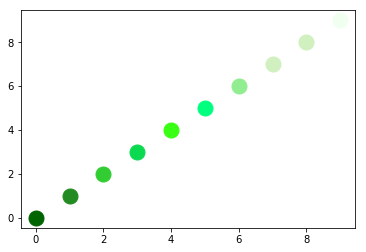

In [161]:
for i in range(10):
    plt.plot(i, i, '.', color=colors[i],  markersize=30)
plt.savefig(folder_name + '/Test.pdf', dpi=1500)  

In [162]:
#len(c_k_o_i_3_norm[c_k_o_i_3_norm == 1])
#len(c_k_o_i_3_norm[c_k_o_i_3_norm <= 0.4])

In [163]:
def plot_custom_clusters_2(c_k_o_i, clusters_averages, clusters_labels, size, description, image_name, alpha=1, beta=0, not_outlier=False):
    X = np.array(select_df)
    
    for i in range(c_k_o_i.shape[0]):
        lab = int(sampled_df.iloc[i]['L'])
        if c_k_o_i[i][0] > 0:
            R = 1
        elif c_k_o_i[i][0] == 0:
            R = 0.6
        else:
            R = 0.2
        
        if c_k_o_i[i][1] >= 0:
            G = c_k_o_i[i][1]
        else:
            G = 0
        
        #lab = sampled_df.iloc[i]['L']
        #col = colors[int((1-R)*10)-1]
        col = getColor(R)
        
        plt.plot(X[i][0], X[i][1], '.', color=col)
    
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.savefig(image_name + '.pdf', dpi=1500)  

In [164]:
def plot_custom_clusters_3(c_k_o_i, c_k_o_i_2, operator, image_name):
    X = np.array(select_df)
    
    for i in range(c_k_o_i.shape[0]):
        lab = int(sampled_df.iloc[i]['L'])
        
        flag = False
        if operator == 'and':
            if c_k_o_i[i][j] > 0 and c_k_o_i_2[i][j] > 0:
                flag = True

        elif operator == 'or':
            if c_k_o_i[i][j] > 0 or c_k_o_i_2[i][j] > 0:
                flag = True

        if flag:
            G = 1
        elif c_k_o_i[i][0] == 0:
            G = 0.6
        else:
            G = 0.2

        col = getColor(G)
        
        plt.plot(X[i][0], X[i][1], '.', color=col)
    
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.savefig(image_name + '.pdf', dpi=1500)  

In [165]:
#c_k_o_i_3_norm

In [166]:
import random
def getColorsInside():
    colors = ['red', 'green', 'blue', 'brown', 'cyan', 'purple', 'yellow', 'magenta']
    for each in np.linspace(0, 1, num_of_clusters, retstep=False):
        colors.append(plt.cm.Spectral(each))
    colors.append('black')
    return colors
    

In [167]:
# Method 3
#plot_custom_clusters_2(c_k_o_i_3_norm, clusters_averages, clusters_labels, 5, "Normal Evaluation: ", folder_name + '/' + identity_name + '-normal-result3')

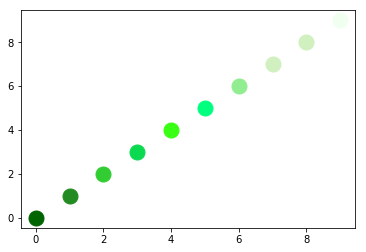

In [168]:
for i in range(10):
    plt.plot(i, i, '.', color=colors[i],  markersize=30)
plt.savefig(folder_name + '/Test.pdf', dpi=1500)  

In [169]:
sigma_multiples = 4

In [170]:
sampled_df.shape


(2252, 3)

In [171]:
sampled_df.describe().transpose()


count        mean        std    min    25%    50%    75%    max
Col1  2252.0  549.044272  61.308540  402.0  498.0  546.5  601.0  693.0
Col2  2252.0  550.203419  64.680066  387.0  498.0  552.0  603.0  690.0
L     2252.0    0.501332   0.500109    0.0    0.0    1.0    1.0    1.0

In [172]:
print(len(sampled_df[sampled_df.L == 0]))
print(len(sampled_df[sampled_df.L == 1]))

1123
1129



# From Here Started Our Method

In [173]:
label_col_name = 'L'
#num_neighbors = 7
num_neighbors_all = len(select_df)
print(len(select_df))

2252


In [174]:
from sklearn.neighbors import KDTree
import numpy as np

X = np.array(select_df)
kdt = KDTree(X, leaf_size=30, metric='euclidean')
knn = kdt.query(X, k=num_neighbors_all, return_distance=True)  

In [175]:
#knn[0] # Distances with neighbors
#knn[1]  # Indices of neighbours
#select_df.head()    
#knn[0].shape

In [176]:
row_neighbors_list_1 = {}
row_neighbors_dist_1 = {}

for i in range(knn[0].shape[0]):
    row_neighbors_list_1[i] = knn[1][i]
    row_neighbors_dist_1[i] = knn[0][i]
    #print(i, knn[i])


In [177]:
#row_neighbors_list_1

In [178]:
#row_neighbors_dist_1
clusters_labelss = np.unique(sampled_df[label_col_name])
for clusters_label in clusters_labelss:
    print(clusters_label)

0
1


In [179]:
def getNearestEvaluationValues(dataset, dataset_neighbors_indices, dataset_neighbors_dist, label_col_name):
    import operator
    clusters_labels = np.unique(dataset[label_col_name])
    print (clusters_labels)
    c_k_o_i = np.zeros((len(dataset),len(clusters_labels)))
    
    for index in dataset_neighbors_indices:
        print(index)
        for clusters_label in clusters_labels:
            print("New clusters_label__________ ", clusters_label)
            nearest_cluster_flage = False
            nearest_non_cluster_flage = False
            
            nearest_cluster_dist = -1
            nearest_non_cluster_dist = -1
            
            clusters_label = int(clusters_label)
            for i in range(num_neighbors_all):
                dataset_index = dataset_neighbors_indices[index][i]
                dataset_distance = dataset_neighbors_dist[index][i]

                # Don't consider itself as neighbor
                if index == dataset_index:
                    continue

                
                neighbor_label = int(sampled_df.iloc[dataset_index]['L'])
                
                if neighbor_label == clusters_label and not nearest_cluster_flage:
                    nearest_cluster_flage = True
                    nearest_cluster_dist = dataset_distance
                    
                    #print("Nearest Cluster Flage and Distance")
                    #print(nearest_cluster_flage)
                    #print(nearest_cluster_dist)
                
                
                if neighbor_label != clusters_label and not nearest_non_cluster_flage:
                    nearest_non_cluster_flage = True
                    nearest_non_cluster_dist = dataset_distance
                
                    #print("Nearest Non-Cluster Flage and Distance")
                    #print(nearest_non_cluster_flage)
                    #print(nearest_non_cluster_dist)

                #print("Cluster Label and Neighbor Label")
                #print(clusters_label)
                #print(neighbor_label)
                
                
                if nearest_cluster_flage and nearest_non_cluster_flage:
                    break
            
            #print("_************************************************_")
            #print(nearest_cluster_dist)
            #print(nearest_non_cluster_dist)
            
            if nearest_cluster_dist == 0:
                c_k_o_i[index][int(clusters_label)] = 1
            
            elif nearest_non_cluster_dist == 0:
                c_k_o_i[index][int(clusters_label)] = -1
            
            else:
                c_k_o_i[index][int(clusters_label)] = 1 - (nearest_cluster_dist/nearest_non_cluster_dist)
                
                #print(c_k_o_i[index][int(clusters_label)])

    return (c_k_o_i)


In [180]:
def getNearestEvaluationValues_2(dataset, dataset_neighbors_indices, dataset_neighbors_dist, label_col_name):
    import operator
    clusters_labels = np.unique(dataset[label_col_name])
    print (clusters_labels)
    c_k_o_i = np.zeros((len(dataset),len(clusters_labels)))
    
    for index in dataset_neighbors_indices:
        print(index)
        for clusters_label in clusters_labels:
            print("New clusters_label__________ ", clusters_label)
            nearest_cluster_flage = False
            farthest_cluster_flage = False
            
            nearest_cluster_dist = -1
            farthest_cluster_dist = -1
            
            clusters_label = int(clusters_label)
            # Finding out Nearest to Cluster
            for i in range(num_neighbors_all):
                dataset_index = dataset_neighbors_indices[index][i]
                dataset_distance = dataset_neighbors_dist[index][i]

                # Don't consider itself as neighbor
                if index == dataset_index:
                    continue

                
                neighbor_label = int(sampled_df.iloc[dataset_index]['L'])
                
                if neighbor_label == clusters_label and not nearest_cluster_flage:
                    nearest_cluster_flage = True
                    nearest_cluster_dist = dataset_distance
                    
                if nearest_cluster_flage:
                    break
                    
            # Finding out Farthest to Cluster
            for i in range(num_neighbors_all):
                dataset_index = dataset_neighbors_indices[index][num_neighbors_all-i-1]
                dataset_distance = dataset_neighbors_dist[index][num_neighbors_all-i-1]

                # Don't consider itself as neighbor
                if index == dataset_index:
                    continue

                
                neighbor_label = int(sampled_df.iloc[dataset_index]['L'])
                
                if neighbor_label == clusters_label and not farthest_cluster_flage:
                    farthest_cluster_flage = True
                    farthest_cluster_dist = dataset_distance
                    
                if farthest_cluster_flage:
                    break

                    
            if nearest_cluster_dist == 0:
                c_k_o_i[index][int(clusters_label)] = 1
            
            elif farthest_cluster_dist == 0:
                c_k_o_i[index][int(clusters_label)] = 1
            
            else:
                #c_k_o_i[index][int(clusters_label)] = 1 - (farthest_cluster_dist - nearest_cluster_dist)
                c_k_o_i[index][int(clusters_label)] = (nearest_cluster_dist/farthest_cluster_dist)
                
                #print(c_k_o_i[index][int(clusters_label)])
    return (c_k_o_i)


In [181]:
def getNearestEvaluationValues_3(dataset, dataset_neighbors_indices, dataset_neighbors_dist, label_col_name):
    import operator
    clusters_labels = np.unique(dataset[label_col_name])
    print (clusters_labels)
    c_k_o_i = np.zeros((len(dataset),len(clusters_labels)))
    
    for index in dataset_neighbors_indices:
        print(index)
        for clusters_label in clusters_labels:
            print("New clusters_label__________ ", clusters_label)
            nearest_cluster_flage = False
            farthest_cluster_flage = False
            
            nearest_cluster_dist = -1
            farthest_cluster_dist = -1
            
            clusters_label = int(clusters_label)
            neighbor_count = 0
            for i in range(8):
                dataset_index = dataset_neighbors_indices[index][i]

                # Don't consider itself as neighbor
                if index == dataset_index:
                    continue

                neighbor_label = int(sampled_df.iloc[dataset_index]['L'])
                
                if neighbor_label == clusters_label:
                    neighbor_count += 1
            
            #print("neighbor_count: ", neighbor_count)
                
            # Finding out Nearest to Cluster
            for i in range(num_neighbors_all):
                dataset_index = dataset_neighbors_indices[index][i]
                dataset_distance = dataset_neighbors_dist[index][i]

                # Don't consider itself as neighbor
                if index == dataset_index:
                    continue


                neighbor_label = int(sampled_df.iloc[dataset_index]['L'])

                if neighbor_label == clusters_label and not nearest_cluster_flage:
                    nearest_cluster_flage = True
                    nearest_cluster_dist = dataset_distance

                if nearest_cluster_flage:
                    break

            # Finding out Farthest to Cluster
            for i in range(num_neighbors_all):
                dataset_index = dataset_neighbors_indices[index][num_neighbors_all-i-1]
                dataset_distance = dataset_neighbors_dist[index][num_neighbors_all-i-1]

                # Don't consider itself as neighbor
                if index == dataset_index:
                    continue


                neighbor_label = int(sampled_df.iloc[dataset_index]['L'])

                if neighbor_label == clusters_label and not farthest_cluster_flage:
                    farthest_cluster_flage = True
                    farthest_cluster_dist = dataset_distance

                if farthest_cluster_flage:
                    break


            if nearest_cluster_dist == 0:
                c_k_o_i[index][int(clusters_label)] = 0

            elif farthest_cluster_dist == 0:
                c_k_o_i[index][int(clusters_label)] = 1

            else:
                if neighbor_count >= 7:
                    c_k_o_i[index][int(clusters_label)] = (nearest_cluster_dist/farthest_cluster_dist)
                else:
                    c_k_o_i[index][int(clusters_label)] = -(nearest_cluster_dist/farthest_cluster_dist)

    return (c_k_o_i)


In [182]:
#c_k_o_i_3 = getNearestEvaluationValues_3(sampled_df, row_neighbors_list_1, row_neighbors_dist_1, label_col_name)
#c_k_o_i_3 = calculate_silhouette_samples(sampled_df, features, file_measures, 'Minimum')
#c_k_o_i_3 = calculate_silhouette_samples_2(sampled_df, features, file_measures, 'Minimum')

In [183]:
len(c_k_o_i_3[c_k_o_i_3 == 1])
c_k_o_i_3

#c_k_o_i_3[c_k_o_i_3 == 1] = np.max(c_k_o_i_3)


array([[ 0.52667222, -0.67407393],
       [ 0.60554301, -0.80766723],
       [ 0.39046095, -0.44415207],
       ...,
       [-0.6514882 ,  0.60423893],
       [-0.16571465,  0.13616518],
       [-0.45117972,  0.40521607]])

print(np.max(c_k_o_i_3))
print(np.min(c_k_o_i_3))

max_val = np.max(c_k_o_i_3)
min_val = np.min(c_k_o_i_3)

c_k_o_i_3_norm = np.zeros((c_k_o_i_3.shape[0],c_k_o_i_3.shape[1]))

for i in range(c_k_o_i_3.shape[0]):
    for j in range(c_k_o_i_3.shape[1]):
        c_k_o_i_3_norm[i][j] = (c_k_o_i_3[i][j] - min_val)/ (max_val - min_val)
        
print(np.max(c_k_o_i_3_norm))
print(np.min(c_k_o_i_3_norm))
#print(len(c_k_o_i_3_norm[c_k_o_i_3_norm == 1]))
#print(c_k_o_i_3_norm.shape)


In [184]:
c_k_o_i_3_norm = c_k_o_i_3

In [185]:
for c in c_k_o_i_3_norm:
    print(c)

[ 0.52667222 -0.67407393]
[ 0.60554301 -0.80766723]
[ 0.39046095 -0.44415207]
[ 0.65951547 -0.88554575]
[ 0.68947461 -0.85712186]
[ 0.35093053 -0.48490247]
[ 0.42916615 -0.56019285]
[ 0.60474736 -0.80364623]
[ 0.70209582 -0.86465323]
[ 0.5668021  -0.72036975]
[ 0.62698289 -0.6900716 ]
[ 0.70484245 -0.94199815]
[ 0.62785261 -0.68355386]
[ 0.66694561 -0.86215846]
[ 0.65117691 -0.82241233]
[ 0.61280886 -0.81601288]
[-0.1559306  -0.01141298]
[-0.09873609 -0.09871461]
[ 0.68890898 -0.80014267]
[ 0.57931893 -0.77578055]
[ 0.61737988 -0.67971672]
[ 0.62223305 -0.74136154]
[ 0.70881286 -0.90516045]
[ 0.6530832  -0.72240173]
[ 0.60149317 -0.8026531 ]
[ 0.53165229 -0.67180734]
[ 0.69334992 -0.81449671]
[ 0.70392018 -0.98040717]
[ 0.59383124 -0.75140559]
[ 0.66637746 -0.76027177]
[ 0.5070527  -0.66073632]
[ 0.66289441 -0.79615813]
[ 0.69038679 -0.83484754]
[ 0.40112693 -0.54730573]
[ 0.62318606 -0.83161592]
[ 0.66746267 -0.7612163 ]
[ 0.65269667 -0.84185944]
[ 0.70244516 -0.86746636]
[ 0.62136409

[-0.75881498  0.67368221]
[-0.57887577  0.5130106 ]
[-0.26438048  0.08240059]
[-0.74118612  0.54778979]
[-0.77091907  0.65391893]
[-0.77939022  0.66350733]
[-0.67196735  0.61487208]
[-0.88234923  0.71540423]
[-0.75363203  0.65925792]
[-0.81613627  0.7006621 ]
[-0.83216845  0.62975724]
[-0.44703323  0.36111146]
[-0.31952494  0.15276137]
[-0.87236748  0.64591596]
[-0.92912381  0.69083049]
[-0.90068264  0.7146869 ]
[-0.80334784  0.66023723]
[-0.71929619  0.55047517]
[-0.86401391  0.71059443]
[-0.51772424  0.40323637]
[-0.76310455  0.58547628]
[-0.89539617  0.66006401]
[-0.73426414  0.58211215]
[-0.83170917  0.67364957]
[-0.92009711  0.71658152]
[-0.79070079  0.68068   ]
[-0.74072572  0.6606737 ]
[-0.86679868  0.71512   ]
[-0.80652363  0.69693917]
[-0.78971078  0.69060605]
[-0.74068946  0.60206812]
[-0.68808206  0.62763582]
[-0.98923833  0.7040952 ]
[-0.82925214  0.63008319]
[-0.94442505  0.68596542]
[-0.59814338  0.46487289]
[-0.75710428  0.65755858]
[-0.85390428  0.70754738]
[-0.75269984

In [186]:
# Not Normalized, but here not possible, as it has negative values
#plot_custom_clusters_2(c_k_o_i_2, clusters_labels, 5, "Normal Evaluation 2: ", folder_name + '/' + identity_name + '-normal-result2')

# Normalized
#plot_custom_clusters_2(c_k_o_i_3_norm, clusters_averages, clusters_labels, 5, "Normal Evaluation: ", folder_name + '/' + identity_name + '-normal-result2')


In [187]:
num_clusters_uni = len(np.unique(clusters_labels))
print(num_clusters_uni)


2


In [188]:
clusters_averages = np.zeros((num_clusters_uni, 3))
for i in range(c_k_o_i_3_norm.shape[0]):
    clusters_averages[int(sampled_df.iloc[i]['L'])][0] += c_k_o_i_3_norm[i][int(sampled_df.iloc[i]['L'])]
    clusters_averages[int(sampled_df.iloc[i]['L'])][1] += 1

In [189]:
clusters_averages

array([[ 648.9650102 , 1123.        ,    0.        ],
       [ 653.95757715, 1129.        ,    0.        ]])

In [190]:
for i in range(clusters_averages.shape[0]):
    clusters_averages[i][2] = round(clusters_averages[i][0]/clusters_averages[i][1],4)

print(clusters_averages[i][0])

653.957577149402


In [191]:
clusters_averages

array([[6.48965010e+02, 1.12300000e+03, 5.77900000e-01],
       [6.53957577e+02, 1.12900000e+03, 5.79200000e-01]])

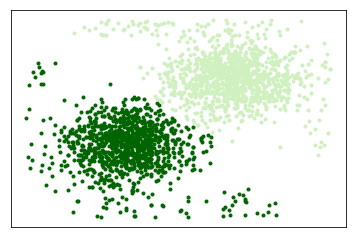

In [193]:
plot_custom_clusters_2(c_k_o_i_3_norm, clusters_averages, clusters_labels, 5, "Normal Evaluation: ", folder_name + '/' + identity_name + '-normal-result2')


## Again Finding Neighbors for Spatial Filters

In [194]:
label_col_name = 'L'
num_neighbors = 7
#num_neighbors = len(select_df)
#print(len(select_df))

In [195]:
from sklearn.neighbors import KDTree
import numpy as np

X = np.array(select_df)
kdt = KDTree(X, leaf_size=30, metric='euclidean')
knn = kdt.query(X, k=num_neighbors, return_distance=False)  

In [196]:
knn.shape

(2252, 7)

In [197]:
row_neighbors_list = {}

for i in range(knn.shape[0]):
    row_neighbors_list[i] = knn[i]
    #print(i, knn[i])

In [198]:
for index in row_neighbors_list:
    #print((row_neighbors_list[index]))
    mylist = row_neighbors_list[index]
    #print("______________")

In [199]:
def getClustersInside(dataset, c_k_o_i, alpha = 1.0):
    cluster_inside = {}
    cluster_inside = set(cluster_inside)
    dataset['Col2'][0]
    
    clusters_labels = {}
    
    final_list = []
    my_dict = {}
    for i in range(c_k_o_i.shape[0]):
        #inner_list = []
        for j in range(c_k_o_i.shape[1]):
            if c_k_o_i[i][j] >= alpha:
                #obj = [dataset['Col1'][i], dataset['Col2'][i], j]
                obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_list:
                    final_list.append(obj)
                cluster_inside.add(obj)
                clusters_labels[obj] = j
                
                # Try to keep Maximum Valued Record in a dictionay
                key = (dataset['Col1'][i], dataset['Col2'][i])
                if key in my_dict:
                    if my_dict[key] < c_k_o_i[i][j]:
                        my_dict[key] = c_k_o_i[i][j]
                else:
                    my_dict[key] = c_k_o_i[i][j]

    return clusters_labels, final_list, cluster_inside, my_dict


In [200]:
def getNeighbors(index, cluster_label, c_k_o_i):
    #neighbor_c_k_o_i = np.zeros(num_neighbors+1)
    neighbor_c_k_o_i = np.zeros(num_neighbors)
    out_flag = False
    
    for i in range(num_neighbors):
        neighbor_index = row_neighbors_list[index][i]
        neighbor_c_k_o_i[i] = c_k_o_i[neighbor_index][int(cluster_label)]
        if int(cluster_label) != int(sampled_df.iloc[neighbor_index]['L']):
            out_flag = True
        
    #Considering neighbors of point as well as point itself
    #neighbor_c_k_o_i[i+1] = c_k_o_i[index][int(cluster_label)]

    return neighbor_c_k_o_i, out_flag


In [201]:
def getClustersIn_Out_Part(dataset, c_k_o_i, clusters_averages, alpha = 1.0, beta = 0.0, not_outlier=False):
    cluster_inside = {}
    cluster_outside = {}
    cluster_partial = {}

    cluster_inside = set(cluster_inside)
    cluster_outside = set(cluster_outside)
    cluster_partial = set(cluster_partial)
    
    clusters_labels = {}
    
    final_inside = []
    final_outside = []
    final_partial = []
    
    dict_inside = {}
    dict_outside = {}
    dict_partial = {}
    
    outliers_indices = []
    
    for i in range(c_k_o_i.shape[0]):
        #inner_list = []
        for j in range(c_k_o_i.shape[1]):
            
            obj = [] 
            for col in features:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                obj.append(dataset[col][i])
            obj = tuple(obj)
            
            cluster_neighbors, out_flag = getNeighbors(i,j,c_k_o_i)
            mean = np.mean(cluster_neighbors)
            std = np.std(cluster_neighbors)
            
            if (mean-(3*std) <= c_k_o_i[i][j] <= mean+(3*std)) and not out_flag:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                #print(c_k_o_i[i][j])
                if obj not in final_inside:
                    final_inside.append(obj)
                
                # Remove from partial as well as outside
                if obj in final_partial:
                    #print("Removed... " + str(obj))
                    final_partial.remove(obj)
                    
                #For outliers
                if i in outliers_indices:
                    outliers_indices.remove(i)
                
                if obj in final_outside:
                    final_outside.remove(obj)
                
                #Cluster Inside 
                #cluster_inside.add(obj)
                clusters_labels[obj] = j

                # Try to keep Maximum Valued Record in a dictionay
                #key = (dataset['Col1'][i], dataset['Col2'][i])
                key = obj
                if key in dict_inside:
                    if dict_inside[key] < c_k_o_i[i][j]:
                        dict_inside[key] = c_k_o_i[i][j]
                else:
                    dict_inside[key] = c_k_o_i[i][j]

            elif c_k_o_i[i][j] <= beta:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_outside and obj not in final_inside and obj not in final_partial:
                    final_outside.append(obj)
                    
                    #For outliers
                    if i not in outliers_indices:
                        outliers_indices.append(i)

                    if not_outlier:
                        clusters_labels[obj] = j
                    else:
                        clusters_labels[obj] = -1
                
                #Cluster outside 
                #cluster_outside.add(obj)
                
                # Try to keep Maximum Valued Record in a dictionay
                key = obj
                if key in dict_outside:
                    if dict_outside[key] < c_k_o_i[i][j]:
                        dict_outside[key] = c_k_o_i[i][j]
                else:
                    dict_outside[key] = c_k_o_i[i][j]

            elif c_k_o_i[i][j] < alpha and c_k_o_i[i][j] > beta:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_partial and obj not in final_inside:
                    final_partial.append(obj)
                    #For outliers
                    if i not in outliers_indices:
                        outliers_indices.append(i)

                    if not_outlier:
                        clusters_labels[obj] = j
                    else:
                        clusters_labels[obj] = -1

                # Remove from outside
                if obj in final_outside:
                    final_outside.remove(obj)
                
                #Cluster Partial
                #cluster_partial.add(tuple(obj)) 
 
                # Try to keep Maximum Valued Record in a dictionay
                #key = (dataset['Col1'][i], dataset['Col2'][i])
                key = obj
                if key in dict_partial:
                    if dict_partial[key] < c_k_o_i[i][j]:
                        dict_partial[key] = c_k_o_i[i][j]
                else:
                    dict_partial[key] = c_k_o_i[i][j]

            
    #return cluster_inside, cluster_outside, cluster_partial, final_inside, final_outside, final_partial, dict_inside, dict_outside, dict_partial
    return clusters_labels, final_inside, final_outside, final_partial, outliers_indices


In [202]:
def getClustersIn_Out_Part_3(dataset, c_k_o_i, c_k_o_i_2, operator, alpha = 1.0, beta = 0.0, not_outlier=False):
    cluster_inside = {}
    cluster_outside = {}
    cluster_partial = {}

    cluster_inside = set(cluster_inside)
    cluster_outside = set(cluster_outside)
    cluster_partial = set(cluster_partial)
    
    clusters_labels = {}
    
    final_inside = []
    final_outside = []
    final_partial = []
    
    dict_inside = {}
    dict_outside = {}
    dict_partial = {}
    
    outliers_indices = []
    
    for i in range(c_k_o_i.shape[0]):
        #inner_list = []
        for j in range(c_k_o_i.shape[1]):
            
            obj = [] 
            for col in features:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                obj.append(dataset[col][i])
            obj = tuple(obj)
            
            cluster_neighbors, out_flag = getNeighbors(i,j,c_k_o_i)
            mean = np.mean(cluster_neighbors)
            std = np.std(cluster_neighbors)
            
            flag = False
            if operator == 'and':
                if c_k_o_i[i][j] > 0 and c_k_o_i_2[i][j] > 0:
                    flag = True

            elif operator == 'or':
                if c_k_o_i[i][j] > 0 or c_k_o_i_2[i][j] > 0:
                    flag = True
            
            if flag:
                if obj not in final_inside:
                    final_inside.append(obj)
                
                # Remove from partial as well as outside
                if obj in final_partial:
                    final_partial.remove(obj)
                    
                #For outliers
                if i in outliers_indices:
                    outliers_indices.remove(i)
                
                if obj in final_outside:
                    final_outside.remove(obj)
                
                clusters_labels[obj] = j

                key = obj
                if key in dict_inside:
                    if dict_inside[key] < c_k_o_i[i][j]:
                        dict_inside[key] = c_k_o_i[i][j]
                else:
                    dict_inside[key] = c_k_o_i[i][j]

            elif c_k_o_i[i][j] <= beta:
                if obj not in final_outside and obj not in final_inside and obj not in final_partial:
                    final_outside.append(obj)
                    
                    #For outliers
                    if i not in outliers_indices:
                        outliers_indices.append(i)

                    if not_outlier:
                        clusters_labels[obj] = j
                    else:
                        clusters_labels[obj] = -1
                
                # Try to keep Maximum Valued Record in a dictionay
                key = obj
                if key in dict_outside:
                    if dict_outside[key] < c_k_o_i[i][j]:
                        dict_outside[key] = c_k_o_i[i][j]
                else:
                    dict_outside[key] = c_k_o_i[i][j]

            elif c_k_o_i[i][j] < alpha and c_k_o_i[i][j] > beta:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_partial and obj not in final_inside:
                    final_partial.append(obj)
                    #For outliers
                    if i not in outliers_indices:
                        outliers_indices.append(i)

                    if not_outlier:
                        clusters_labels[obj] = j
                    else:
                        clusters_labels[obj] = -1

                # Remove from outside
                if obj in final_outside:
                    final_outside.remove(obj)
                
                # Try to keep Maximum Valued Record in a dictionay
                #key = (dataset['Col1'][i], dataset['Col2'][i])
                key = obj
                if key in dict_partial:
                    if dict_partial[key] < c_k_o_i[i][j]:
                        dict_partial[key] = c_k_o_i[i][j]
                else:
                    dict_partial[key] = c_k_o_i[i][j]

    return clusters_labels, final_inside, final_outside, final_partial, outliers_indices


In [203]:
def getClusters_Centroids_MeanDistance(dataset, features_set, label_col_name, knn):
    import math
    
    clusters_labels = np.unique(dataset[label_col_name])        
    clusters_centroids = {}
        
    for i in range(len(clusters_labels)):
        # Get all records of specific cluster
        cluster_dataset = dataset[features_set].loc[dataset[label_col_name] == clusters_labels[i]]
        
        sum_of_cluster = np.sum(cluster_dataset, axis=0)
        centroid = sum_of_cluster/len(cluster_dataset)
        average_distance = 0
        total_distance = 0
        centroid_distances_all = np.zeros(len(cluster_dataset))
        #print("centroid: ", centroid)
        total_average_distances_list = np.zeros(len(cluster_dataset))
        neighbor_distance_list = np.zeros(knn.shape[1])
        j = 0
        for index, o_c in cluster_dataset.iterrows():                                                              
            
            #print("o_c: ", o_c)
            
            centroid_distance = 0
            for col in features_set:
                if col != label_col_name:
                    centroid_distance += (o_c[col] - centroid[col])**2
                    #print(col, ":", (o_c[col] - centroid[col])**2)

            #print("index: ", index)
            for k in range(knn.shape[1]):
                neighbor_distance = 0
                for col in features_set:
                    #print(dataset.iloc[knn[index][k]][col])
                    if col != label_col_name:
                        neighbor_distance += (dataset.iloc[index][col] - dataset.iloc[knn[index][k]][col])**2
            
                neighbor_distance_list[k] =  math.sqrt(neighbor_distance)
                #print(dataset.iloc[knn[index][j]])
            
            centroid_distance = math.sqrt(centroid_distance)
            centroid_distances_all[j] = centroid_distance
            #print(centroid_distance)
            total_distance += centroid_distance
            total_average_distances_list[j] = np.mean(neighbor_distance_list)
            j += 1
        
        #print(total_average_distances_list)
        #print(total_distance)
        average_distance = total_distance/len(cluster_dataset)
        centroid_distance_std = np.std(centroid_distances_all)
        
        total_average_distance = np.sum(total_average_distances_list)
        average_distance_std = np.std(total_average_distances_list)
        average_distance_average = total_average_distance/len(cluster_dataset)
        clusters_centroids[clusters_labels[i]] = (centroid,average_distance,average_distance_average, average_distance_std,centroid_distance_std)
    return clusters_centroids

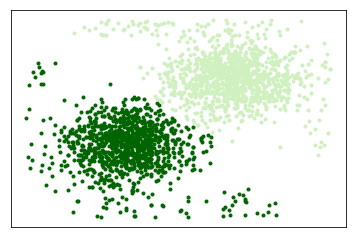

In [204]:
sampled_df.shape
#print(sampled_df)
plot_custom_clusters_2(c_k_o_i_3_norm, clusters_averages, clusters_labels, 5, "Normal Evaluation 2: ", folder_name + '/' + identity_name + '-normal-result2')

In [205]:
clusters_centroids = getClusters_Centroids_MeanDistance(sampled_df, features, label_col_name, knn)

In [206]:
#clusters_centroids = getClusters_Centroids_MeanDistance(sampled_df, features, label_col_name, knn)

In [207]:
print("Centroid,  Average_distance, Average_distance_average,  Average_distance_std")
#clusters_centroids

Centroid,  Average_distance, Average_distance_average,  Average_distance_std


In [208]:
def getEvaluationValues(dataset, dataset_neighbors, label_col_name):
    import operator
    clusters_labels = np.unique(dataset[label_col_name])
    print (clusters_labels)
    c_k_o_i = np.zeros((len(dataset),len(clusters_labels)))
    
    neighbor_averages_list = [] 
    for index in dataset_neighbors:
        for i in range(num_neighbors):
            dataset_index = dataset_neighbors[index][i]
            cluster_label = sampled_df.iloc[dataset_index]['L']
            c_k_o_i[index][int(cluster_label)] += 1
    
    
    return (c_k_o_i/num_neighbors)

import random
colors = ['red', 'green', 'blue', 'brown', 'cyan', 'purple', 'yellow', 'magenta']

for each in np.linspace(0, 1, num_of_clusters, retstep=False):
    colors.append(plt.cm.Spectral(each))

colors.append('black')
print("Clusters: ", num_of_clusters)
print("Colors: ", len(colors))


In [209]:
import operator
import math

In [210]:
#Update Nearest Neighbor Evaluation Values By Applying Distance based on 3*Sigma + Mean
def getUpdatedEvaluation(dataset, clusters_labels, dataset_neighbors, clusters_centroids, c_k_o_i, features_set):
    
    clusters_labels = np.unique(dataset[label_col_name])        
    
    count_fringe = 0
    for index, o_c in dataset.iterrows():
        total_distance = 0
        for i in range(num_neighbors):
            distance = 0
            neighbor_index = dataset_neighbors[index][i]
            neighbor_obj = dataset.iloc[neighbor_index]

            for col in features_set:
                if col != label_col_name:
                    distance += (neighbor_obj[col] - o_c[col])**2

            distance = math.sqrt(distance)
            total_distance += distance 


        neighbor_average = total_distance/num_neighbors
        cluster_label = dataset.iloc[index]['L']
        cluster_average = clusters_centroids[cluster_label][1]
        cluster_average_average = clusters_centroids[cluster_label][2]
        cluster_average_std = clusters_centroids[cluster_label][3]
        
        #print("neighbor_average: ",neighbor_average)
        #print("cluster_average_average: ", cluster_average_average)
        #print("cluster_average: ", cluster_average)
        #if (sigma_multiples*neighbor_average) > cluster_average:
        #print("1: ", neighbor_average)
        #print(sigma_multiples*cluster_average_std + cluster_average_average)
        #print("cluster_average_std: ", cluster_average_std)
        
        #Code to set evaluation value score based on 3*Sigma + Mean rule
        if (neighbor_average) > (sigma_multiples*cluster_average_std + cluster_average_average):
            #print("sigma_multiples*cluster_average_std + cluster_average_average: ", sigma_multiples*cluster_average_std + cluster_average_average)
            count_fringe += 1
            cluster_label = dataset.iloc[index]['L']
            #c_k_o_i_min_inside[index][int(cluster_label)] = 0
            c_k_o_i[index][int(cluster_label)] = (sigma_multiples*cluster_average_std + cluster_average_average)/neighbor_average
    
    #print(count_fringe)
    return c_k_o_i


In [211]:
#print(c_k_o_i)

In [212]:
#Applying Spatial Filters to Get New Evalaution Values

def getUpdatedEvaluationValues(dataset, dataset_neighbors, label_col_name, c_k_o_i, features_set):
    import operator
    clusters_labels = np.unique(dataset[label_col_name])
    c_k_o_i_mean = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_min = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_max = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_median = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_laplacian = np.zeros((len(dataset),len(clusters_labels)))
    
    #Considering only neighbors of point
    #neighbor_c_k_o_i = np.zeros(num_neighbors)

    #Considering neighbors of point as well as point itself
    neighbor_c_k_o_i = np.zeros(num_neighbors+1)
    
    for cluster_label in clusters_labels:
        for index in row_neighbors_list:
            total_distance= 0
            for i in range(num_neighbors):
                neighbor_index = row_neighbors_list[index][i]
                
                ####################
                distance = 0
                neighbor_obj = dataset.iloc[neighbor_index]
                o_c = dataset.iloc[index]
                
                for col in features_set:
                    if col != label_col_name:
                        distance += (neighbor_obj[col] - o_c[col])**2

                distance = math.sqrt(distance)
                
                average_distance = clusters_centroids[cluster_label][1]
                centroid_distance_std = clusters_centroids[cluster_label][4]
                
                cluster_average_average = clusters_centroids[cluster_label][2]
                cluster_average_std = clusters_centroids[cluster_label][3]
                
                #Code to consider only those neighbors which are in specific radius
                '''
                if distance > (sigma_multiples*cluster_average_std + cluster_average_average):
                    #print("distance", distance)
                    #print("cluster_average_std", cluster_average_std)
                    #print("cluster_average_average", cluster_average_average)
                    #print("3*sigma + Mean", sigma_multiples*cluster_average_std + cluster_average_average)
                    
                    #neighbor_c_k_o_i[i] = c_k_o_i[index][int(cluster_label)] # Assign object evaluation value
                    #neighbor_c_k_o_i[i] = 0  # Assign 0 evaluation value
                    neighbor_c_k_o_i[i] = (sigma_multiples*cluster_average_std + cluster_average_average)/distance
                '''
                #Code to consider only those neighbors which are in specific radius based on centroid distance
                
                '''
                if distance > (sigma_multiples*centroid_distance_std + average_distance):
                    print("distance", distance)
                    print("centroid_distance_std", centroid_distance_std)
                    print("average_distance", average_distance)
                    print("3*sigma + Mean", sigma_multiples*centroid_distance_std + average_distance)
                    
                    #neighbor_c_k_o_i[i] = c_k_o_i[index][int(cluster_label)] # Assign object evaluation value
                    #neighbor_c_k_o_i[i] = 0  # Assign 0 evaluation value
                    neighbor_c_k_o_i[i] = (sigma_multiples*cluster_average_std + cluster_average_average)/distance
                else:
                    neighbor_c_k_o_i[i] = c_k_o_i[neighbor_index][int(cluster_label)]
                '''
                
                # Code not consider radius for neighbors
                neighbor_c_k_o_i[i] = c_k_o_i[neighbor_index][int(cluster_label)]
                
                total_distance += distance

            #Considering neighbors of point as well as point itself
            neighbor_c_k_o_i[i+1] = c_k_o_i[index][int(cluster_label)]
            
            #neighbor_c_k_o_i = np.sort(neighbor_c_k_o_i)
            
            c_k_o_i_mean[index][int(cluster_label)] =  np.mean(neighbor_c_k_o_i)
            c_k_o_i_min[index][int(cluster_label)] =  np.nanmin(neighbor_c_k_o_i)
            c_k_o_i_max[index][int(cluster_label)] =  np.nanmax(neighbor_c_k_o_i)
            c_k_o_i_median[index][int(cluster_label)] =  np.median(neighbor_c_k_o_i)
            
            laplacian_value = np.sum(neighbor_c_k_o_i[0:num_neighbors]) - neighbor_c_k_o_i[num_neighbors]*(num_neighbors)
            c_k_o_i_laplacian[index][int(cluster_label)] = (laplacian_value-(-num_neighbors))/(num_neighbors-(-num_neighbors))
            
            #print(neighbor_c_k_o_i)
            #print("Mean", np.mean(neighbor_c_k_o_i))
            #print("Min", np.nanmin(neighbor_c_k_o_i))
            #print("Max", np.nanmax(neighbor_c_k_o_i))
            #print("Median", np.median(neighbor_c_k_o_i))
            #print("Laplacian", c_k_o_i_laplacian[index][int(cluster_label)])            
    
    return c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian

In [213]:
#row_neighbors_list
#plot_custom_clusters_2(c_k_o_i_3_norm, clusters_labels, 5, "Normal Evaluation 2: ", folder_name + '/' + identity_name + '-normal-result2')


In [214]:
# Normal
#c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian = getUpdatedEvaluationValues(sampled_df, row_neighbors_list, label_col_name, c_k_o_i, features)

# Method 1: Nearest in C / Nearest Not in C
#c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian = getUpdatedEvaluationValues(sampled_df, row_neighbors_list, label_col_name, c_k_o_i_norm, features)

# Method 2: Nearest in C / Farthest in C
c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian = getUpdatedEvaluationValues(sampled_df, row_neighbors_list, label_col_name, c_k_o_i_3_norm, features)

In [215]:
print(len(c_k_o_i_min[c_k_o_i_min  == 1]))
print(len(c_k_o_i_max[c_k_o_i_max  == 1]))
print(len(c_k_o_i_mean[c_k_o_i_mean == 1]))

print(len(c_k_o_i_3_norm[c_k_o_i_3_norm == 1]))

0
0
0
0


In [216]:
write_to_file('../Files/sampled_df.csv', np.array(sampled_df))
write_to_file('../Files/c_k_o_i.csv', c_k_o_i_3_norm)
write_to_file('../Files/c_k_o_i_mean.csv', c_k_o_i_mean)
write_to_file('../Files/c_k_o_i_min.csv', c_k_o_i_min)
write_to_file('../Files/c_k_o_i_max.csv', c_k_o_i_max)
write_to_file('../Files/c_k_o_i_median.csv', c_k_o_i_median)
write_to_file('../Files/c_k_o_i_laplacian.csv', c_k_o_i_laplacian)

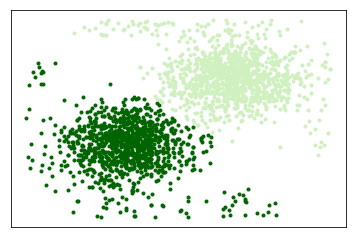

In [217]:
plot_custom_clusters_2(c_k_o_i_3_norm, clusters_averages, clusters_labels, 5, "Normal Evaluation: ", folder_name + '/' + identity_name + '-normal-result2')


print(len(c_k_o_i[c_k_o_i == 1]))
print(len(c_k_o_i_norm[c_k_o_i_norm == 1]))
print(len(c_k_o_i_min[c_k_o_i_min == 1]))
print(len(c_k_o_i_max[c_k_o_i_max == 1]))

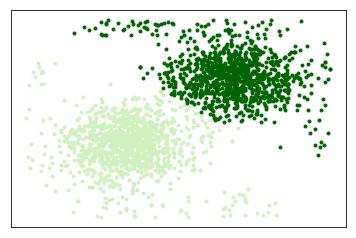

In [218]:
#plot_custom_clusters_2(c_k_o_i_min, clusters_averages, clusters_labels, 5, "Minimum Evaluation: ", folder_name + '/' + identity_name + '-minimum-result2')
plot_custom_clusters_3(c_k_o_i_3_norm, c_k_o_i_min, 'and', folder_name + '/' + identity_name + '-minimum-result2')

In [220]:
colors_inside = getColorsInside()

Total Inside:  2074
Total Outside:  21
Total Partial:  18


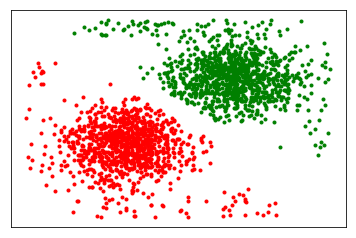

In [221]:
alpha = 1
#clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_sharp, clusters_averages, alpha)
clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part_3(sampled_df, c_k_o_i_3_norm, c_k_o_i_min, 'and', alpha)
print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

plot_custom_clusters(final_inside, clusters_labels, 5, colors_inside, "Minimum (Inside) Plot: ", folder_name + '/' + identity_name + '-minimum-3wc-inside')


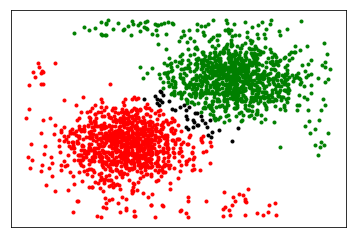

In [222]:
final_list = final_inside + final_partial + final_outside

plot_custom_clusters(final_list, clusters_labels, 5, colors_inside, "Minimum Plot: ", folder_name + '/' + identity_name + '-minimum-3wc-inside')

In [223]:
# Run this Code only if we have Test data in dataset i.e. sampled_df['Out']
def euclidean_distance(row1, row2, features_set):
    distance = 0.0
    for col in features_set:
        if col != label_col_name:
            distance += (row1[col] - row2[col])**2
    return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(dataset_train, row, row_index, num_neighbors,final_inside):
    distances = list()
    neighbors = list()

    #Code used to count object itself as neighbour of its own
    #distances.append((row_index, row, 0))

    for index, row_dataset_train in dataset_train.iterrows():
        if tuple(row_dataset_train) in final_list:
            dist = euclidean_distance(row, row_dataset_train, features)
            #print(dist)
            distances.append((index, row_dataset_train, dist))

    distances.sort(key=lambda tup: tup[2])
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])        
    return neighbors


def get_testdata_neighbors_list(num_neighbors, final_inside):
    row_neighbors_list_test = {}
    # calculate the Euclidean distance between two vectors
    for index, row in select_df_test.iterrows():
        neighbors = get_neighbors(select_df, row, index, num_neighbors,final_inside)
        row_neighbors_list_test[index] = neighbors
    
    return row_neighbors_list_test


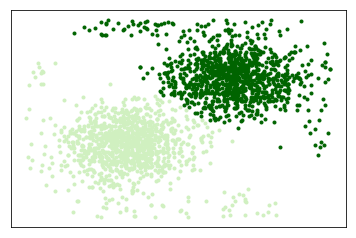

In [242]:
#plot_custom_clusters_2(c_k_o_i_mean, clusters_averages, clusters_labels, 5, "Blurred Evaluation: ", folder_name + '/' + identity_name + '-blurred-result')
plot_custom_clusters_3(c_k_o_i_3_norm, c_k_o_i_mean, 'and', folder_name + '/' + identity_name + '-blurred-result')

In [243]:
#write_to_file('../Files/c_k_o_i_mean.csv', c_k_o_i_mean)

In [244]:
c_k_o_i_mean.shape
c_k_o_i_3_norm.shape

(2252, 2)

In [245]:
# plot_custom_clusters_2(c_k_o_i_mean, clusters_averages, clusters_labels, 5, "Blurr Plot: ", folder_name + '/' + identity_name + '-blurred-3wc-inside')
#write_to_file('Files/sampled_df2.csv', np.array(final_inside))


In [246]:
#colors_inside = getColorsInside()
c_k_o_i_mean[c_k_o_i_mean == 0]

array([], dtype=float64)

Total Inside:  2092
Total Outside:  21
Total Partial:  0


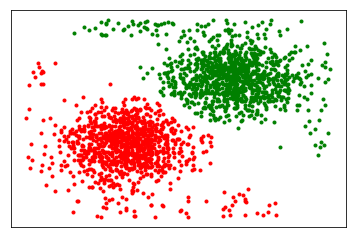

In [247]:
alpha = 1
#clusters_labels, final_inside, cluster_inside, my_dict = getClustersInside(sampled_df, c_k_o_i_mean, alpha)
#clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_mean, clusters_averages, alpha)
clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part_3(sampled_df, c_k_o_i_3_norm, c_k_o_i_mean, 'and', alpha)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

plot_custom_clusters(final_inside, clusters_labels, 5, colors_inside, "Blurr (Inside) Plot: ", folder_name + '/' + identity_name + '-blurred-3wc-inside')


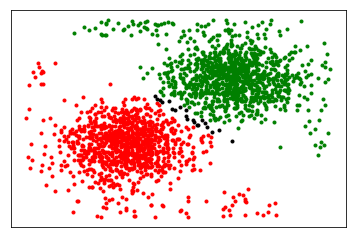

In [248]:
final_list = final_inside + final_partial + final_outside

plot_custom_clusters(final_list, clusters_labels, 5, colors_inside, "Blurr Plot: ", folder_name + '/' + identity_name + '-blurred-3wc-inside')

In [249]:
c_k_o_i_diff = np.zeros((c_k_o_i_3_norm.shape[0],c_k_o_i_3_norm.shape[1]))
for i in range(c_k_o_i_3_norm.shape[0]):
    for j in range(c_k_o_i_3_norm.shape[1]):
        #c_k_o_i_diff[i][j] = c_k_o_i[i][j] - c_k_o_i_mean[i][j]
        c_k_o_i_diff[i][j] = c_k_o_i_3_norm[i][j] - c_k_o_i_mean[i][j]

#Sharp Image = Original + Difference
c_k_o_i_sharp = np.zeros((c_k_o_i_3_norm.shape[0],c_k_o_i_3_norm.shape[1]))
for i in range(c_k_o_i_3_norm.shape[0]):
    for j in range(c_k_o_i_3_norm.shape[1]):
        #c_k_o_i_sharp[i][j] = c_k_o_i[i][j] + c_k_o_i_diff[i][j]
        c_k_o_i_sharp[i][j] = c_k_o_i_3_norm[i][j] + c_k_o_i_diff[i][j]
        if c_k_o_i_sharp[i][j] > 1:
            c_k_o_i_sharp[i][j] = 1
        

In [250]:
c_k_o_i_sharp.shape

(2252, 2)

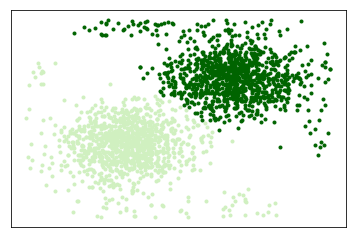

In [251]:
#plot_custom_clusters_2(c_k_o_i_sharp, clusters_averages, clusters_labels, 5, "Sharpe Evaluation: ", folder_name + '/' + identity_name + '-sharpe-result')
plot_custom_clusters_3(c_k_o_i_3_norm, c_k_o_i_sharp, 'or', folder_name + '/' + identity_name + '-sharpe-result')

Total Inside:  2095
Total Outside:  18
Total Partial:  0


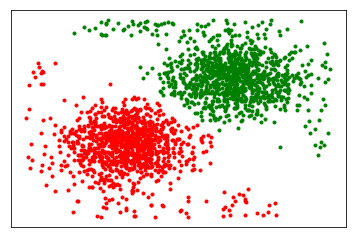

In [252]:
alpha = 1
#clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_sharp, clusters_averages, alpha)
clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part_3(sampled_df, c_k_o_i_3_norm, c_k_o_i_sharp, 'or', alpha)
print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

plot_custom_clusters(final_inside, clusters_labels, 5, colors_inside, "Sharpe (Inside) Plot: ", folder_name + '/' + identity_name + '-sharpe-3wc-inside')


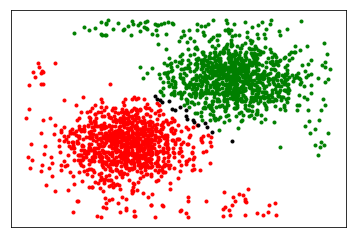

In [253]:
final_list = final_inside + final_partial + final_outside

plot_custom_clusters(final_list, clusters_labels, 5, colors_inside, "Sharpe (Inside) Plot: ", folder_name + '/' + identity_name + '-sharpe-3wc-inside')


In [254]:
c_k_o_i_sharp

array([[ 0.52857657, -0.67711997],
       [ 0.60674801, -0.81006538],
       [ 0.34443528, -0.38256175],
       ...,
       [-0.66265268,  0.61352875],
       [-0.14763448,  0.12084468],
       [-0.45739623,  0.41034177]])

In [255]:
for i in range(c_k_o_i_mean.shape[0]):
    for i in range(c_k_o_i_mean.shape[1]):
        if c_k_o_i_mean[i][j] > 0 and c_k_o_i_sharp[i][j] <= 0:
            print(i,j)
        if c_k_o_i_sharp[i][j] > 0 and c_k_o_i_mean[i][j] <= 0:
            print(i,j)